In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pt
import seaborn as sns
import json
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', -1)

In [3]:
import pickle
df = pd.read_pickle("projectData/authorExperienceMatrix.p")
dF = pd.DataFrame(df.items())
dF.columns= ["name", "experience"]
dF[['name','commits']]= pd.DataFrame(dF.name.tolist(), index=dF.index)
experienceCommits = dF

In [4]:
df = pd.read_pickle("projectData/defectAuthorMatrix.p")
dF = pd.DataFrame(df, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [5]:
hadoop1000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHADOOP1000.p")
hadoop1000 = pd.DataFrame(hadoop1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [6]:
hadoop2000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHADOOP2000.p")
hadoop2000 = pd.DataFrame(hadoop1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [7]:
hdfsMatrix = pd.read_pickle("projectData/defectAuthorMatrixForHDFS.p")
hdfs = pd.DataFrame(hdfsMatrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [8]:
hdfs2000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHDFS2000.p")
hdfs2000 = pd.DataFrame(hdfs2000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [9]:
hdfs1000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHDFS1000.p")
hdfs1000 = pd.DataFrame(hdfs1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [10]:
yarnMatrix = pd.read_pickle("projectData/defectAuthorMatrixForYARN.p")
yarn = pd.DataFrame(yarnMatrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [11]:
yarn1000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForYARN1000.p")
yarn1000 = pd.DataFrame(yarn1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [12]:
mapreduceMatrix = pd.read_pickle("projectData/defectAuthorMatrixForMAPREDUCE.p")
mapreduce = pd.DataFrame(mapreduceMatrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [13]:
mapreduce1000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForMAPREDUCE1000.p")
mapreduce1000 = pd.DataFrame(mapreduce1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [14]:
dF=pd.concat([dF, hadoop1000, hdfs, hdfs2000, hdfs1000, yarn, yarn1000, mapreduce, mapreduce1000])

In [15]:
# from pandas.tools.plotting import table
testDf= dF.head()

testDf

,parentCommit,file,lineNumber,author,implicated
0,52ee3ecdf683c6963c0e1a8e7567067320950d08,hadoop-common-project/hadoop-common/src/test/java/org/apache/hadoop/fs/contract/AbstractContractAppendTest.java,27,Steve Loughran,6ba46c2dfc742e22ae9974c3fb5c64410971cd95
1,52ee3ecdf683c6963c0e1a8e7567067320950d08,hadoop-common-project/hadoop-common/src/test/java/org/apache/hadoop/fs/contract/AbstractContractAppendTest.java,33,Steve Loughran,6ba46c2dfc742e22ae9974c3fb5c64410971cd95
2,6f50a6a4565d89a886a240c459899692ed5807c3,hadoop-common-project/hadoop-common/src/main/java/org/apache/hadoop/fs/permission/UmaskParser.java,36,Suresh Srinivas,cdbb724edbe093a02d4e2c24523001dcdff0ffd5
3,2ec008eb38b7a8b4dceb5e64c4c6d73fee147740,hadoop-common-project/hadoop-common/src/main/java/org/apache/hadoop/fs/FsShell.java,282,Colin Patrick Mccabe,016c794e75be975078a5b422e79720bbc1044028
4,2ec008eb38b7a8b4dceb5e64c4c6d73fee147740,hadoop-common-project/hadoop-common/src/test/java/org/apache/hadoop/tracing/SetSpanReceiver.java,89,Akira Ajisaka,e397cca4569e17529a51d95142ebc1cf4c00e31b


In [16]:
implicatedList = dF['implicated'].tolist()
# # dF[['name','commits']]= pd.DataFrame(dF.name.tolist(), index=dF.index)

tempList=[]
commits=experienceCommits['commits'].tolist()
for x in commits:
    if x in implicatedList:
        tempList.append([x, True])
    else:
        tempList.append([x, False])
        

s=pd.DataFrame(tempList, columns=['commit', 'buggy'])
experienceCommits[['buggy']]=pd.DataFrame(s['buggy'])
experienceCommits['buggy'] = experienceCommits.buggy.astype(int)

author name Vinod Kumar Vavilapalli
author name Tsz-wo Sze
author name Suresh Srinivas
author name Alejandro Abdelnur
author name Jing Zhao
author name Arun Murthy
author name Haohui Mai
author name Todd Lipcon
author name Jian He
author name Andrew Wang


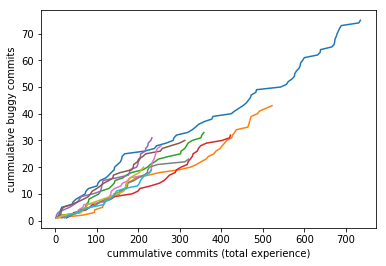

In [25]:
data= dF.groupby('author')['implicated'].nunique()
authorDf = pd.DataFrame(data)
topBugyContributers= authorDf.implicated.nlargest(10)
tempBuggy=[]
for author in topBugyContributers.index:
    tempBuggy= experienceCommits.loc[(experienceCommits['name']==author) & (experienceCommits["buggy"]==1)]
    tempDf = pd.DataFrame(tempBuggy['buggy'].cumsum())
#     tempBuggy[['cumBuggy']]=0
    tempBuggy[['cumBuggy']]= tempDf
    print("author name", author)
    pt.plot(tempBuggy['experience'], tempBuggy['cumBuggy'], label= str(author))
#     pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

pt.xlabel("cummulative commits (total experience)")
pt.ylabel("cummulative buggy commits")
pt.savefig("commitGraph.png", bbox_inches="tight")
# Not plotting the non buggy commits, only the buggy commits, which is why this is a smooth curve. 
# I am filtering the experience matrix first based on the buggyiness. 

[ 0.  5. 10. 15. 20. 25. 30. 35. 40.] <a list of 9 Text yticklabel objects>


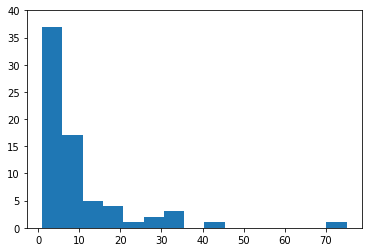

In [874]:
import math
authorDf.implicated.hist(bins=15, grid=False)
locs, label= pt.yticks()
print(locs, label)
yint=[]
for each in locs:
    yint.append(int(each))
pt.yticks(yint)


pt.savefig('histDefects.pdf', bbox_inches="tight")

In [875]:
topContributors= experienceCommits.groupby('name')['commits']
topContributors=topContributors.nunique().nlargest(5)
# topContributors.columns=['somethingelse']
# topContributors
# tempBuggy= dF.loc[dF['author'].isin(topContributors.index)]
# tempBuggy.groupby('author')['implicated'].nunique().nsmallest(2)


author name Vinod Kumar Vavilapalli
author name Tsz-wo Sze
author name Alejandro Abdelnur
author name Eli Collins
author name Arun Murthy


Text(0.5, 1.0, 'author with most experience and their bug plot')

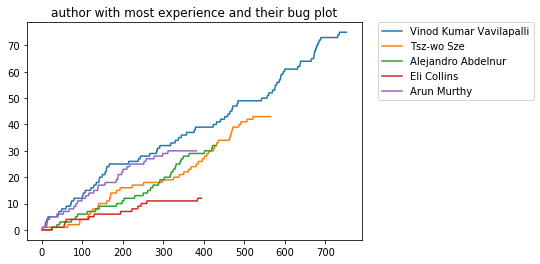

In [876]:
tempBuggy=[]
for author in topContributors.index:
    tempBuggy= experienceCommits.loc[(experienceCommits['name']==author)]
    tempDf= pd.DataFrame(tempBuggy['buggy'].cumsum())
    # tempDf = pd.DataFrame(tempBuggy['buggy'].cumsum())
    # tempBuggy[['cumBuggy']]=0
    tempBuggy[['cumBuggy']]= tempDf
    print("author name", author)
    pt.plot(tempBuggy['experience'], tempBuggy['cumBuggy'], label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
pt.title("author with most experience and their bug plot")

author name Vinod Kumar Vavilapalli
author name Tsz-wo Sze
author name Suresh Srinivas
author name Alejandro Abdelnur
author name Jing Zhao


Text(0.5, 1.0, 'author with most bugs vs experience')

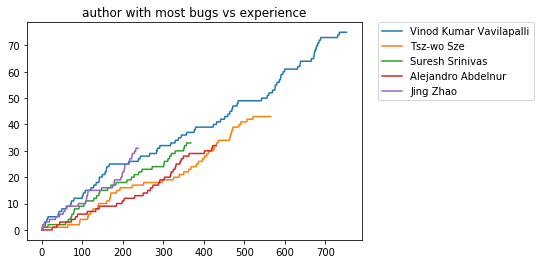

In [877]:
data= dF.groupby('author')['implicated'].nunique()
authorDf = pd.DataFrame(data)
topBugyContributers= authorDf.implicated.nlargest(5)
tempBuggy=[]
for author in topBugyContributers.index:
    tempBuggy= experienceCommits.loc[(experienceCommits['name']==author)]
    tempDf= pd.DataFrame(tempBuggy['buggy'].cumsum())
    # tempDf = pd.DataFrame(tempBuggy['buggy'].cumsum())
    # tempBuggy[['cumBuggy']]=0
    tempBuggy[['cumBuggy']]= tempDf
    print("author name", author)
    pt.plot(tempBuggy['experience'], tempBuggy['cumBuggy'], label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
pt.title("author with most bugs vs experience")

author name Arun Suresh
author name Benoy Antony
author name Dongming Liang
author name Gera Shegalov
author name Giridharan Kesavan


Text(0.5, 1.0, 'author with least bugs')

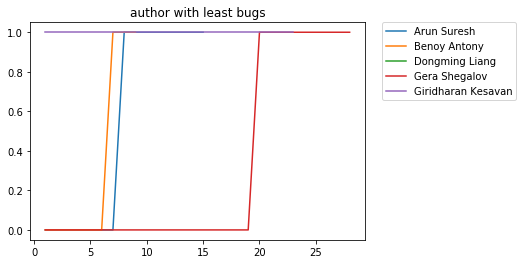

In [878]:
data= dF.groupby('author')['implicated'].nunique()
authorDf = pd.DataFrame(data)
topBugyContributers= authorDf.implicated.nsmallest(5)
tempBuggy=[]
for author in topBugyContributers.index:
    tempBuggy= experienceCommits.loc[(experienceCommits['name']==author)]
    tempDf= pd.DataFrame(tempBuggy['buggy'].cumsum())
    # tempDf = pd.DataFrame(tempBuggy['buggy'].cumsum())
    # tempBuggy[['cumBuggy']]=0
    tempBuggy[['cumBuggy']]= tempDf
    print("author name", author)
    pt.plot(tempBuggy['experience'], tempBuggy['cumBuggy'], label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

pt.title("author with least bugs")

author name Robert Joseph Evans
author name Aaron Myers
author name Eli Collins
author name Todd Lipcon
author name Haohui Mai


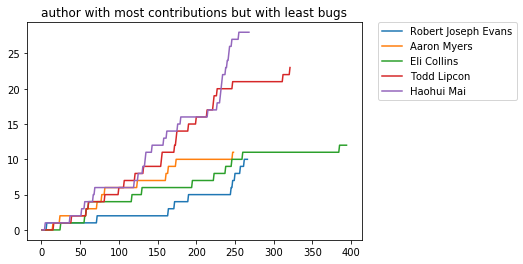

In [879]:
topContributors= experienceCommits.groupby('name')['commits']
topContributors=topContributors.nunique().nlargest(10)
topContributors.columns=['somethingelse']
topContributors
tempBuggy= dF.loc[dF['author'].isin(topContributors.index)]
bottomBuggyContributor = tempBuggy.groupby('author')['implicated'].nunique().nsmallest(5)

tempBuggy=[]
for author in bottomBuggyContributor.index:
    tempBuggy= experienceCommits.loc[(experienceCommits['name']==author)]
    tempDf= pd.DataFrame(tempBuggy['buggy'].cumsum())
    # tempDf = pd.DataFrame(tempBuggy['buggy'].cumsum())
    # tempBuggy[['cumBuggy']]=0
    tempBuggy[['cumBuggy']]= tempDf
    print("author name", author)
    pt.plot(tempBuggy['experience'], tempBuggy['cumBuggy'], label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    pt.title("author with most contributions but with least bugs")